In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from warnings import filterwarnings
filterwarnings ('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
state_txn=pd.read_excel('phonepe/phonepe.xlsx',sheet_name='State_Txn and Users')
state_txnsplit=pd.read_excel('phonepe/phonepe.xlsx',sheet_name='State_TxnSplit')
state_devicedata=pd.read_excel('phonepe/phonepe.xlsx',sheet_name='State_DeviceData')
district_txn=pd.read_excel('phonepe/phonepe.xlsx',sheet_name='District_Txn and Users')
district_demographics=pd.read_excel('phonepe/phonepe.xlsx',sheet_name='District Demographics')

# loading and understanding the dataset.

In [3]:
state_txn.head()
state_txn.shape
state_txn.describe().T
state_txn.info()
state_txn.isnull().sum()
state_txn.isnull().sum()/state_txn.shape[0]

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


(504, 8)

,count,mean,std,min,25%,50%,75%,max
Year,504.0,2.019286e+03,1.031181e+00,2.018000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03
Quarter,504.0,2.357143e+00,1.109971e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Transactions,504.0,4.074000e+07,8.228714e+07,7.780000e+02,5.925578e+05,6.217487e+06,4.363675e+07,5.736165e+08
Amount (INR),503.0,7.083332e+10,1.440902e+11,1.928611e+06,1.167157e+09,1.051605e+10,6.947045e+10,1.027958e+12
ATV (INR),504.0,1.993472e+03,6.074649e+02,0.000000e+00,1.598911e+03,1.861381e+03,2.259088e+03,3.938734e+03
Registered Users,504.0,4.777501e+06,6.644496e+06,5.010000e+02,1.574202e+05,1.747914e+06,7.320945e+06,3.966470e+07
App Opens,504.0,9.774471e+07,2.042376e+08,0.000000e+00,0.000000e+00,2.930574e+06,8.615022e+07,1.208084e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB


State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

State               0.000000
Year                0.000000
Quarter             0.000000
Transactions        0.000000
Amount (INR)        0.001984
ATV (INR)           0.000000
Registered Users    0.000000
App Opens           0.000000
dtype: float64

In [4]:
state_txnsplit.tail(10)
state_txnsplit.shape
state_txnsplit.describe().T
state_txnsplit.info()
state_txnsplit.isnull().sum()
state_txnsplit.isnull().sum()/state_txnsplit.shape[0]

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


(2514, 7)

,count,mean,std,min,25%,50%,75%,max
Year,2514.0,2.019287e+03,1.030807e+00,2018.000000,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03
Quarter,2514.0,2.358393e+00,1.109251e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Transactions,2514.0,8.167446e+06,2.423645e+07,2.000000,2.788075e+04,2.687980e+05,3.683230e+06,2.795990e+08
Amount (INR),2514.0,1.443978e+10,5.995054e+10,34.397212,1.762412e+07,1.901189e+08,2.661248e+09,8.721520e+11
ATV (INR),2514.0,1.349928e+03,1.534866e+03,17.198606,3.857358e+02,7.209404e+02,1.352790e+03,7.767540e+03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 non-null   int64  
 2   Quarter           2514 non-null   int64  
 3   Transaction Type  2514 non-null   object 
 4   Transactions      2514 non-null   int64  
 5   Amount (INR)      2514 non-null   float64
 6   ATV (INR)         2514 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 137.6+ KB


State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

State               0.0
Year                0.0
Quarter             0.0
Transaction Type    0.0
Transactions        0.0
Amount (INR)        0.0
ATV (INR)           0.0
dtype: float64

In [5]:
state_devicedata.head()
state_devicedata.shape
state_devicedata.describe().T
state_devicedata.info()
state_devicedata.isnull().sum()
state_devicedata.isnull().sum()/state_devicedata.shape[0]

,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


(5544, 6)

,count,mean,std,min,25%,50%,75%,max
Year,5544.0,2019.285714,1.030250,2018.000000,2018.000000,2019.000000,2020.000000,2.021000e+03
Quarter,5544.0,2.357143,1.108970,1.000000,1.000000,2.000000,3.000000,4.000000e+00
Registered Users,5544.0,434318.262446,905606.949794,10.000000,8055.750000,74422.500000,397887.500000,9.764252e+06
Percentage,5544.0,0.090909,0.083095,0.006373,0.021588,0.056914,0.143626,4.783670e-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             5544 non-null   object 
 1   Year              5544 non-null   int64  
 2   Quarter           5544 non-null   int64  
 3   Brand             5544 non-null   object 
 4   Registered Users  5544 non-null   int64  
 5   Percentage        5544 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 260.0+ KB


State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

State               0.0
Year                0.0
Quarter             0.0
Brand               0.0
Registered Users    0.0
Percentage          0.0
dtype: float64

In [6]:
district_txn.head(10)
district_txn.tail(10)
district_txn.shape
district_txn.describe(exclude='object').T
district_txn.info()
district_txn.isnull().sum()
district_txn.isnull().sum()/district_txn.shape[0]

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,1.999694e+10,2324.616616,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,1.122758e+10,2032.445525,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,3.041482e+10,1762.331031,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8.731263e+09,1784.157359,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,1.339853e+10,2011.243709,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5.564221e+09,2469.272118,392388,8184990


(10248, 10)

,count,mean,std,min,25%,50%,75%,max
Year,10248.0,2.019286e+03,1.030208e+00,2018.000000,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03
Quarter,10248.0,2.357143e+00,1.108924e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Transactions,10248.0,2.003607e+06,9.613466e+06,0.000000,1.031418e+05,3.763065e+05,1.272815e+06,3.487128e+08
Amount (INR),10248.0,3.542311e+09,1.473154e+10,0.000000,1.756668e+08,6.784562e+08,2.377256e+09,4.444224e+11
ATV (INR),10244.0,1.909797e+03,6.009433e+02,84.944283,1.554589e+03,1.863136e+03,2.203084e+03,1.120998e+04
Registered Users,10248.0,2.349591e+05,4.605978e+05,22.000000,3.619550e+04,1.067640e+05,2.573165e+05,1.060461e+07
App Opens,10248.0,4.807117e+06,1.562541e+07,0.000000,0.000000e+00,6.403025e+05,4.346320e+06,5.544197e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10248 entries, 0 to 10247
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             10248 non-null  object 
 1   Year              10248 non-null  int64  
 2   Quarter           10248 non-null  int64  
 3   District          10248 non-null  object 
 4   Code              10220 non-null  object 
 5   Transactions      10248 non-null  int64  
 6   Amount (INR)      10248 non-null  float64
 7   ATV (INR)         10244 non-null  float64
 8   Registered Users  10248 non-null  int64  
 9   App Opens         10248 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 800.8+ KB


State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

State               0.000000
Year                0.000000
Quarter             0.000000
District            0.000000
Code                0.002732
Transactions        0.000000
Amount (INR)        0.000000
ATV (INR)           0.000390
Registered Users    0.000000
App Opens           0.000000
dtype: float64

In [7]:
district_demographics.iloc[::10]
district_demographics.shape
district_demographics.describe().T
district_demographics.info()
district_demographics.isnull().sum()
district_demographics.isnull().sum()/district_demographics.shape[0]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


(742, 8)

,count,mean,std,min,25%,50%,75%,max
Population,742.0,1.668555e+06,1.458849e+06,0.0,653081.50,1322359.0,2297440.00,10082852.0
Area (sq km),742.0,4.395373e+03,4.254676e+03,0.0,2039.75,3402.5,5432.75,45652.0
Density,742.0,8.385121e+02,2.754407e+03,0.0,198.00,353.0,686.25,36155.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           742 non-null    object 
 1   District        742 non-null    object 
 2   Headquarters    742 non-null    object 
 3   Population      742 non-null    int64  
 4   Area (sq km)    742 non-null    float64
 5   Density         742 non-null    int64  
 6   Code            742 non-null    object 
 7   Alternate Name  742 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 46.5+ KB


State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

State             0.0
District          0.0
Headquarters      0.0
Population        0.0
Area (sq km)      0.0
Density           0.0
Code              0.0
Alternate Name    0.0
dtype: float64

# creating a summary

In [8]:
# calculate a total no of state and total no of district.

district_txn['District'].nunique()
district_txn['State'].nunique()

723

36

In [9]:
# identify states with heighest no of districts.

district_txn.groupby('State')['District'].nunique().sort_values(ascending=False).idxmax()
# up has heighest no of district

'Uttar Pradesh'

# EDA

Year  State                    
2018  Andaman & Nicobar Islands        58021
      Andhra Pradesh                77779112
      Arunachal Pradesh               435229
      Assam                          8806777
      Bihar                         44556885
                                     ...    
2021  Telangana                    908439654
      Tripura                        3255852
      Uttar Pradesh                446448678
      Uttarakhand                   44608834
      West Bengal                  260151489
Name: Transactions, Length: 144, dtype: int64

<Figure size 2000x400 with 0 Axes>

<Axes: xlabel='State', ylabel='Transactions'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),


Text(0.5, 1.0, 'transactions trends over the year for each state')

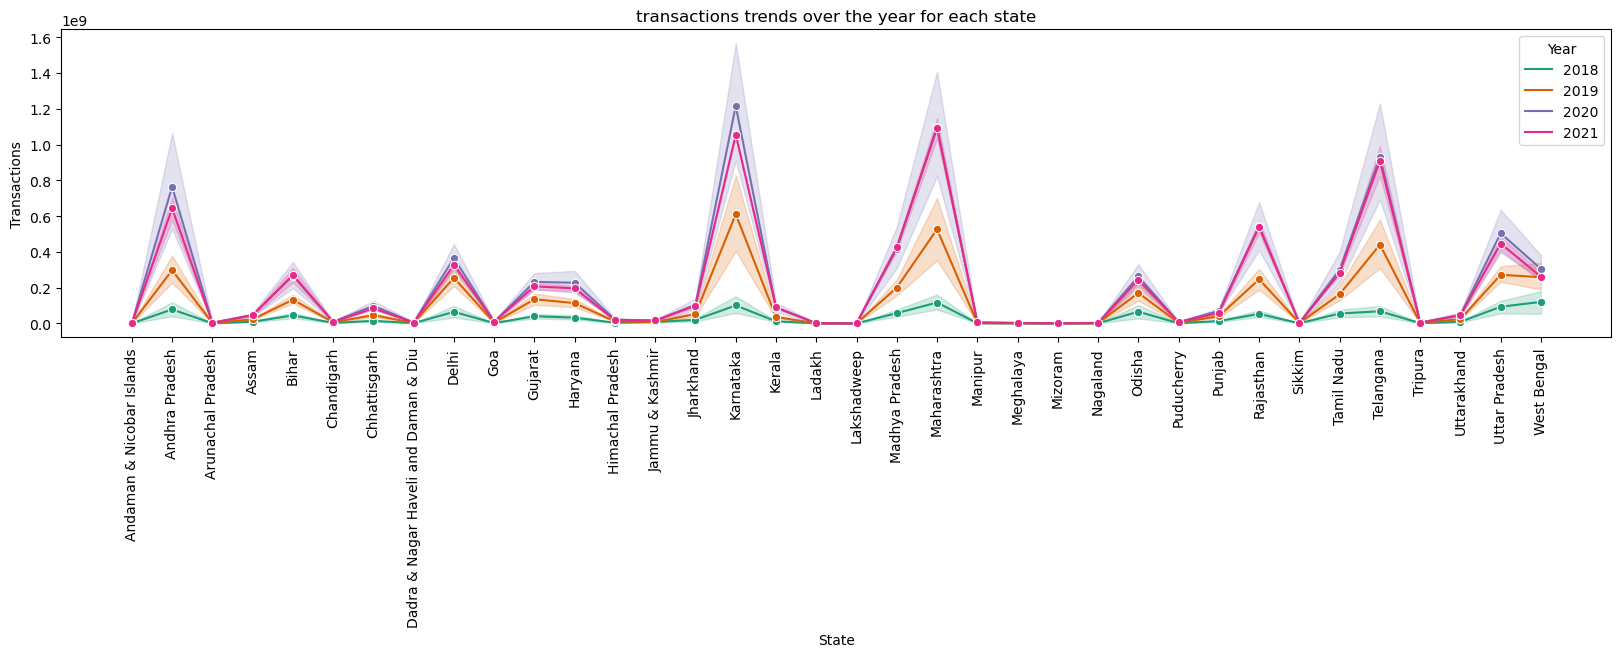

In [59]:
# analyze transaction trends over the years for each state.

transaction=state_txn.groupby(['Year','State'])['Transactions'].sum()
transaction

# plotting
plt.figure(figsize=(20,4))
sns.lineplot(x='State',y='Transactions',data=state_txn,hue='Year',palette='Dark2',marker='o',estimator=sum)
plt.xticks(rotation=90)
plt.title('transactions trends over the year for each state')

In [11]:
# calculate total number of transactions and total transactions amount,for each state over the years 
# display the results in a tabular format

table=state_txn.groupby(['Year','State'])[['Transactions','Amount (INR)']].sum()
table

Transactions  Amount (INR)
Year State                                                
2018 Andaman & Nicobar Islands         58021  1.890761e+08
     Andhra Pradesh                 77779112  1.220720e+11
     Arunachal Pradesh                435229  1.127124e+09
     Assam                           8806777  1.320755e+10
     Bihar                          44556885  6.808569e+10
...                                      ...           ...
2021 Telangana                     908439654  1.827318e+12
     Tripura                         3255852  6.803496e+09
     Uttar Pradesh                 446448678  8.784601e+11
     Uttarakhand                    44608834  7.727901e+10
     West Bengal                   260151489  5.223720e+11

[144 rows x 2 columns]

State
Karnataka         2981044533
Maharashtra       2833670154
Telangana         2347430243
Andhra Pradesh    1781091169
Rajasthan         1382918930
Name: Transactions, dtype: int64

([<matplotlib.patches.Wedge at 0x211a6a6e890>,
 [Text(0.8126209712950282, 0.882976306030646, 'karnataka'),
  Text(-0.8400007856864974, 0.7102103069134291, 'maharashtra'),
  Text(-0.8158372421643328, -0.7378411714574457, 'telengana'),
  Text(0.33513686132631304, -1.0477038151025069, 'andrapradesh'),
  Text(1.0200609518601798, -0.4116742091631489, 'rajasthan')],
 [Text(0.4740288999220998, 0.5150695118512102, '26%'),
  Text(-0.45818224673808944, 0.38738744013459764, '25%'),
  Text(-0.44500213208963607, -0.40245882079497036, '21%'),
  Text(0.18280192435980708, -0.571474808237731, '16%'),
  Text(0.5563968828328253, -0.22454956863444483, '12%')])

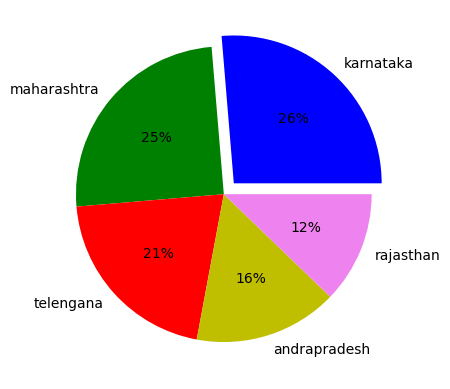

In [12]:
# top 5 state with heighest transactions volume.

top_5=state_txn.groupby('State')['Transactions'].sum().sort_values(ascending=False)[0:5]
top_5

label=['karnataka','maharashtra','telengana','andrapradesh','rajasthan']
color=['b','g','r','y','violet']
explode=[0.1,0,0,0,0]

# plotting
plt.pie(top_5,labels=label,colors=color,explode=explode,autopct='%.0f%%')
plt.show()

State
Lakshadweep                    71610
Andaman & Nicobar Islands    1223565
Ladakh                       1880109
Mizoram                      2162776
Meghalaya                    5648913
Name: Transactions, dtype: int64

([<matplotlib.patches.Wedge at 0x211a68a5890>,
 [Text(1.299727485802554, 0.026616961685593386, 'lakshadweep'),
  Text(1.0170584943214627, 0.4190370140316476, 'andaman & nicobar'),
  Text(0.31720523984536775, 1.053271491978513, 'ladakh'),
  Text(-0.8361277917088622, 0.7147659168791289, 'mizoram'),
  Text(-0.04887044998957359, -1.0989138633750222, 'meghalaya')],
 [Text(0.7998322989554176, 0.01637966872959593, '0.7%'),
  Text(0.5547591787207978, 0.22856564401726231, '11.1%'),
  Text(0.17302103991565512, 0.5745117228973707, '17.1%'),
  Text(-0.4560697045684702, 0.38987231829770663, '19.7%'),
  Text(-0.026656609085221956, -0.599407561840921, '51.4%')])

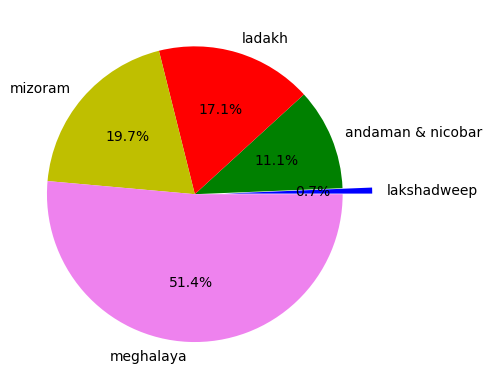

In [13]:
# top 5 state with lowest transactions volume.

top_low=state_txn.groupby('State')['Transactions'].sum().sort_values(ascending=True).head(5)
top_low

# plotting
label=['lakshadweep','andaman & nicobar','ladakh','mizoram','meghalaya']
color=['b','g','r','y','violet']
explode=[0.2,0,0,0,0]

plt.pie(top_low,labels=label,colors=color,explode=explode,autopct='%.1f%%')
plt.show()

In [14]:
# identify most common transaction type in each state and quarter.

state_txnsplit.groupby(['Quarter','State'])['Transaction Type'].value_counts().unstack(-1).idxmax(axis=1)

Quarter  State                    
1        Andaman & Nicobar Islands    Financial Services
         Andhra Pradesh               Financial Services
         Arunachal Pradesh            Financial Services
         Assam                        Financial Services
         Bihar                        Financial Services
                                             ...        
4        Telangana                    Financial Services
         Tripura                      Financial Services
         Uttar Pradesh                Financial Services
         Uttarakhand                  Financial Services
         West Bengal                  Financial Services
Length: 144, dtype: object

In [15]:
# for each state and quarter display the most frequent transaction type.

state_txnsplit.groupby(['Quarter','State'])['Transaction Type'].value_counts().unstack(-1).idxmax(axis=1)

Quarter  State                    
1        Andaman & Nicobar Islands    Financial Services
         Andhra Pradesh               Financial Services
         Arunachal Pradesh            Financial Services
         Assam                        Financial Services
         Bihar                        Financial Services
                                             ...        
4        Telangana                    Financial Services
         Tripura                      Financial Services
         Uttar Pradesh                Financial Services
         Uttarakhand                  Financial Services
         West Bengal                  Financial Services
Length: 144, dtype: object

In [16]:
# identify the device brand with heighest no registered users on each state.

state_devicedata.groupby(['State','Brand'])['Registered Users'].sum().unstack(-1).idxmax(axis=1)



State
Andaman & Nicobar Islands                Xiaomi
Andhra Pradesh                           Xiaomi
Arunachal Pradesh                        Xiaomi
Assam                                    Xiaomi
Bihar                                    Xiaomi
Chandigarh                               Xiaomi
Chhattisgarh                             Xiaomi
Dadra & Nagar Haveli and Daman & Diu     Xiaomi
Delhi                                    Xiaomi
Goa                                      Xiaomi
Gujarat                                  Xiaomi
Haryana                                  Xiaomi
Himachal Pradesh                         Xiaomi
Jammu & Kashmir                          Xiaomi
Jharkhand                                Xiaomi
Karnataka                                Xiaomi
Kerala                                   Xiaomi
Ladakh                                   Xiaomi
Lakshadweep                              Xiaomi
Madhya Pradesh                           Xiaomi
Maharashtra                       

In [17]:
# for each state identify the district with the heighest population

district=district_demographics.groupby(['State','District'])['Population'].sum().unstack(-1).idxmax(axis=1)
district

State
Andaman & Nicobar Islands                        South Andaman
Andhra Pradesh                                   East Godavari
Arunachal Pradesh                                   Papum Pare
Assam                                                   Nagaon
Bihar                                                    Patna
Chandigarh                                          Chandigarh
Chhattisgarh                                            Raipur
Dadra & Nagar Haveli and Daman & Diu    Dadra and Nagar Haveli
Delhi                                         North West Delhi
Goa                                                  North Goa
Gujarat                                              Ahmedabad
Haryana                                              Faridabad
Himachal Pradesh                                        Kangra
Jammu & Kashmir                                          Jammu
Jharkhand                                               Ranchi
Karnataka                                      Ba

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
699,Andaman & Nicobar Islands,South Andaman,Port Blair,238142,2672.00,89,AN03,South Andaman
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.00,477,AP03,East Godavari
28,Arunachal Pradesh,Papum Pare,Yupia,176385,2875.00,61,AR16,Papum Pare
64,Assam,Nagaon,Nagaon,2826006,3831.00,738,AS27,Nagaon
97,Bihar,Patna,Patna,5772804,3202.00,1803,BR26,Patna
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.00,9258,CH01,Chandigarh
133,Chhattisgarh,Raipur,Raipur,2160876,2892.00,750,CG24,Raipur
703,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,Silvassa,343709,491.00,700,DD01,Dadra and Nagar Haveli
732,Delhi,North West Delhi,Kanjhawala,3656539,130.00,8254,DL06,North West
138,Goa,North Goa,Panaji,817761,1736.00,471,GA01,North Goa


<Figure size 2000x500 with 0 Axes>

<BarContainer object of 36 artists>

<BarContainer object of 36 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Prad

Text(0.5, 1.0, 'chart depicting the district with heighest population for each state')

Text(0.5, 0, 'district and state')

Text(0, 0.5, 'population')

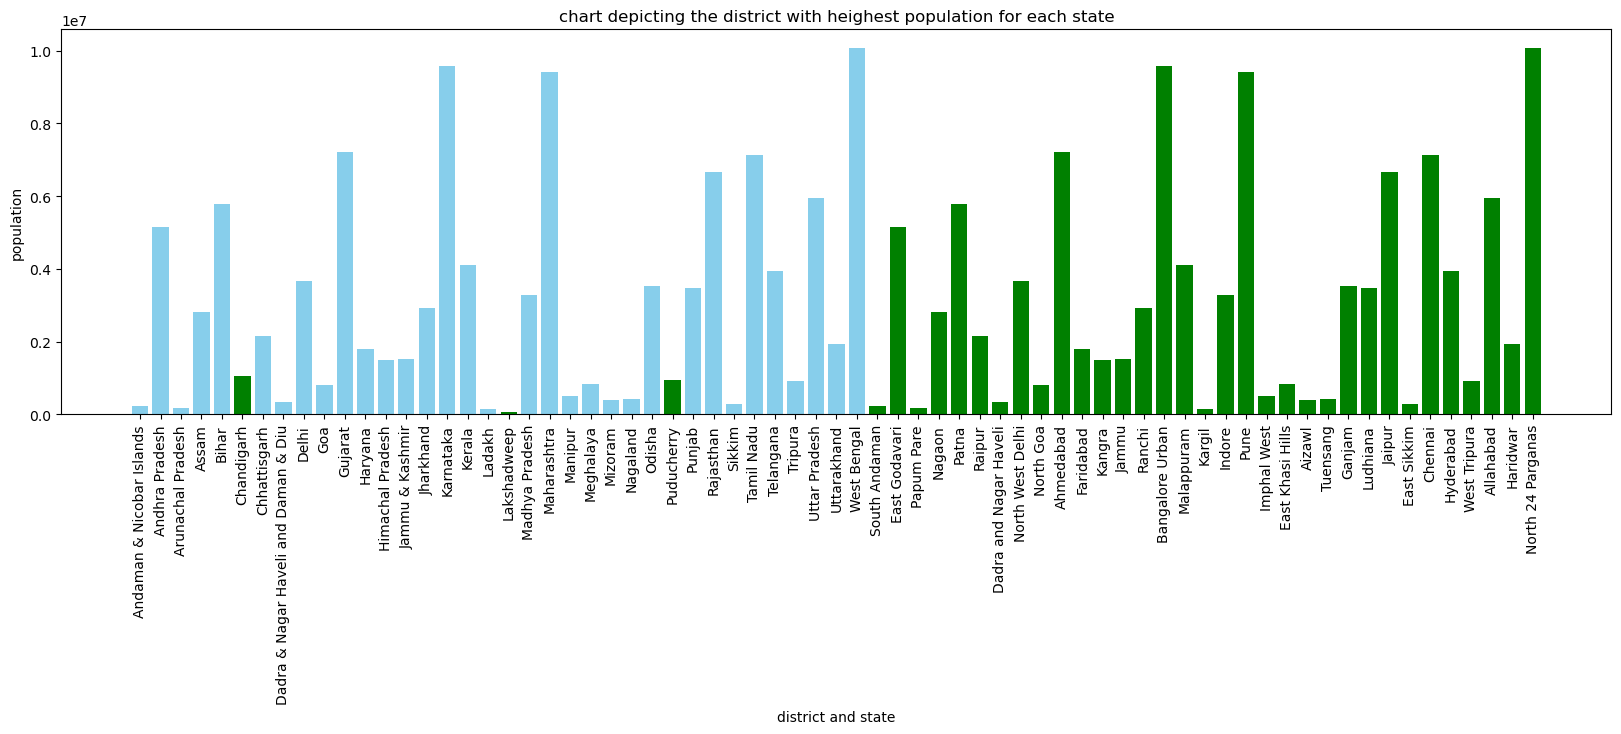

In [18]:
# create a column chart depicting the district with heighest population for each state

# district_demographics.groupby(['State','District'])['Population'].sum().unstack(-2).max()

district_heighest=district_demographics.loc[district_demographics.groupby('State')['Population'].idxmax()]
district_heighest

plt.figure(figsize=(20,5))
plt.bar(district_heighest['State'],district_heighest['Population'],color='skyblue')
plt.bar(district_heighest['District'],district_heighest['Population'],color='green')
plt.xticks(rotation=90)
plt.title('chart depicting the district with heighest population for each state')
plt.xlabel('district and state')
plt.ylabel('population')
plt.show()

In [19]:
# calculate the average transaction value for each state.

atv=district_txn.pivot_table(index='State',
                        values='ATV (INR)',
                        aggfunc=np.sum)
atv

# top 5 state with heighest atv and lowest atv

atv.sort_values(by='ATV (INR)',ascending=False).head(5)
atv.sort_values(by='ATV (INR)',ascending=True).head(5)

,ATV (INR)
State,
Andaman & Nicobar Islands,1.374825e+05
Andhra Pradesh,3.555595e+05
Arunachal Pradesh,9.267974e+05
Assam,8.498806e+05
Bihar,1.096524e+06
Chandigarh,2.959316e+04
Chhattisgarh,6.665593e+05
Dadra & Nagar Haveli and Daman & Diu,6.833818e+04
Delhi,2.416972e+05


,ATV (INR)
State,
Uttar Pradesh,1.862190e+06
Madhya Pradesh,1.246993e+06
Bihar,1.096524e+06
Tamil Nadu,1.020643e+06
Telangana,9.519856e+05


,ATV (INR)
State,
Chandigarh,29593.159044
Lakshadweep,38865.661810
Goa,52454.994103
Dadra & Nagar Haveli and Daman & Diu,68338.182189
Ladakh,94955.426527


In [20]:
# calculate total no of app open over the years and quarter for each state

district_txn.pivot_table(index='State',
                        columns=['Year','Quarter'],
                        values='App Opens',
                        aggfunc=np.sum)

Year                                 2018          2019                        \
Quarter                                 1  2  3  4    1          2          3   
State                                                                           
Andaman & Nicobar Islands               0  0  0  0    0      52640     171107   
Andhra Pradesh                          0  0  0  0    0   81375251  310953542   
Arunachal Pradesh                       0  0  0  0    0     502873    1811700   
Assam                                   0  0  0  0    0    7350326   25393673   
Bihar                                   0  0  0  0    0   39607022  126521298   
Chandigarh                              0  0  0  0    0    1220176    4625196   
Chhattisgarh                            0  0  0  0    0   13206373   46362341   
Dadra & Nagar Haveli and Daman & Diu    0  0  0  0    0     860686    3126189   
Delhi                                   0  0  0  0    0   43731570  163381027   
Goa                                     0  0  0  0    0    1352232    4753892   
Gujarat                                 0  0  0  0    0   34890301  129441484   
Haryana                                 0  0  0  0    0   31929195  118332587   
Himachal Pradesh                        0  0  0  0    0    3321711   10720741   
Jammu & Kashmir                         0  0  0  0    0    2705373    3843919   
Jharkhand                               0  0  0  0    0   14929066   55504460   
Karnataka                               0  0  0  0    0  113024811  445683660   
Kerala                                  0  0  0  0    0    8673220   31471694   
Ladakh                                  0  0  0  0    0     157317     503126   
Lakshadweep                             0  0  0  0    0       4580      15038   
Madhya Pradesh                          0  0  0  0    0   50642151  192353380   
Maharashtra                             0  0  0  0    0  109967705  439998413   
Manipur                                 0  0  0  0    0     464829    1594205   
Meghalaya                               0  0  0  0    0     395764    1387814   
Mizoram                                 0  0  0  0    0     133025     457834   
Nagaland                                0  0  0  0    0     362497    1244022   
Odisha                                  0  0  0  0    0   33955545  130181456   
Puducherry                              0  0  0  0    0     661932    2476922   
Punjab                                  0  0  0  0    0   10928094   40860886   
Rajasthan                               0  0  0  0    0   62787336  238338999   
Sikkim                                  0  0  0  0    0     398520    1316804   
Tamil Nadu                              0  0  0  0    0   33658961  124690342   
Telangana                               0  0  0  0    0   80842302  318124511   
Tripura                                 0  0  0  0    0     953627    3350991   
Uttar Pradesh                           0  0  0  0    0   78394040  268142606   
Uttarakhand                             0  0  0  0    0    7454279   24660988   
West Bengal                             0  0  0  0    0   49514201  176559011   

Year                                                  2020             \
Quarter                                       4          1          2   
State                                                                   
Andaman & Nicobar Islands                177012     193586     305072   
Andhra Pradesh                        411201518  486513773  494341698   
Arunachal Pradesh                       2140340    2598321    3387006   
Assam                                  26599449   33097892   39304924   
Bihar                                 163998097  183868505  218435035   
Chandigarh                              4960441    5201211    3451250   
Chhattisgarh                           57278977   64224101   68493384   
Dadra & Nagar Haveli and Daman & Diu    3770543    4195122    4505127   
Delhi                                

Year,2018,2019,2020,2021
State,,,,
Andaman & Nicobar Islands,0,400759,1901431,3252559
Andhra Pradesh,0,803530311,2546234391,2002414883
Arunachal Pradesh,0,4454913,14461415,17822557
Assam,0,59343448,163599908,158756254
Bihar,0,330126417,986012784,726991268
Chandigarh,0,10805813,20019174,12653457
Chhattisgarh,0,116847691,329536558,330433421
Dadra & Nagar Haveli and Daman & Diu,0,7757418,19318184,12365445
Delhi,0,379795268,754575020,446199374


<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='State', ylabel='App Opens'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),


Text(0.5, 1.0, 'trends in app open over time for states')

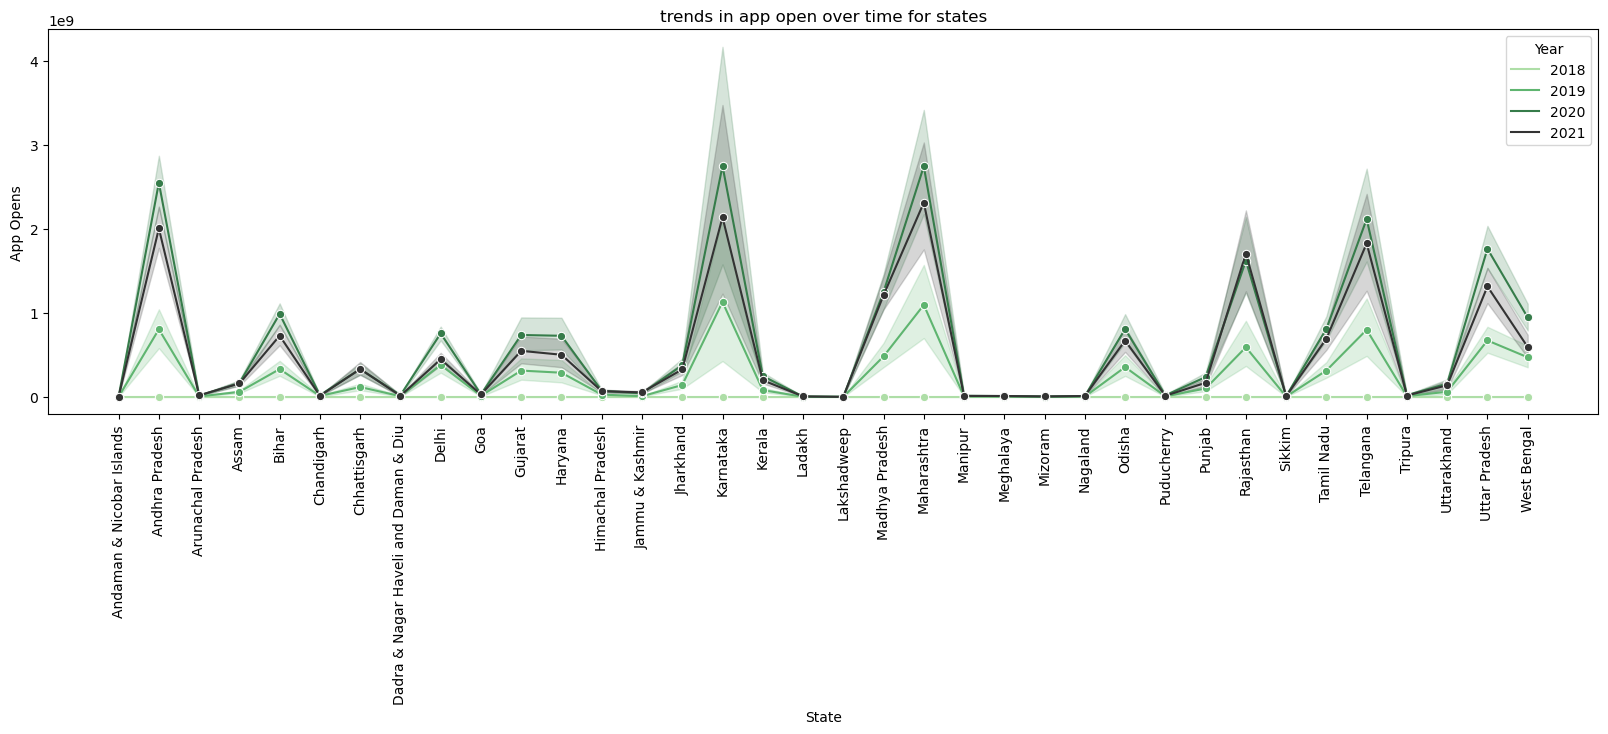

In [54]:
# identify trend in app usage,by creating a line plot showing the no of apps open over time for 
# a seleted state

app=district_txn.pivot_table(index='State',
                            columns='Year',
                            values='App Opens',
                            aggfunc=np.sum)
app

# plotting
plt.figure(figsize=(20,5))
sns.lineplot(x='State',y='App Opens',hue='Year',data=district_txn,palette='Greens_d',marker='o',estimator=sum)
plt.xticks(rotation=90)
plt.title('trends in app open over time for states')

State                      Transaction Type        
Andaman & Nicobar Islands  Financial Services          2
                           Merchant payments           2
                           Others                      2
                           Peer-to-peer payments       2
                           Recharge & bill payments    2
                                                      ..
West Bengal                Financial Services          2
                           Merchant payments           2
                           Others                      2
                           Peer-to-peer payments       2
                           Recharge & bill payments    2
Name: count, Length: 180, dtype: int64

<Axes: xlabel='State,Transaction Type'>

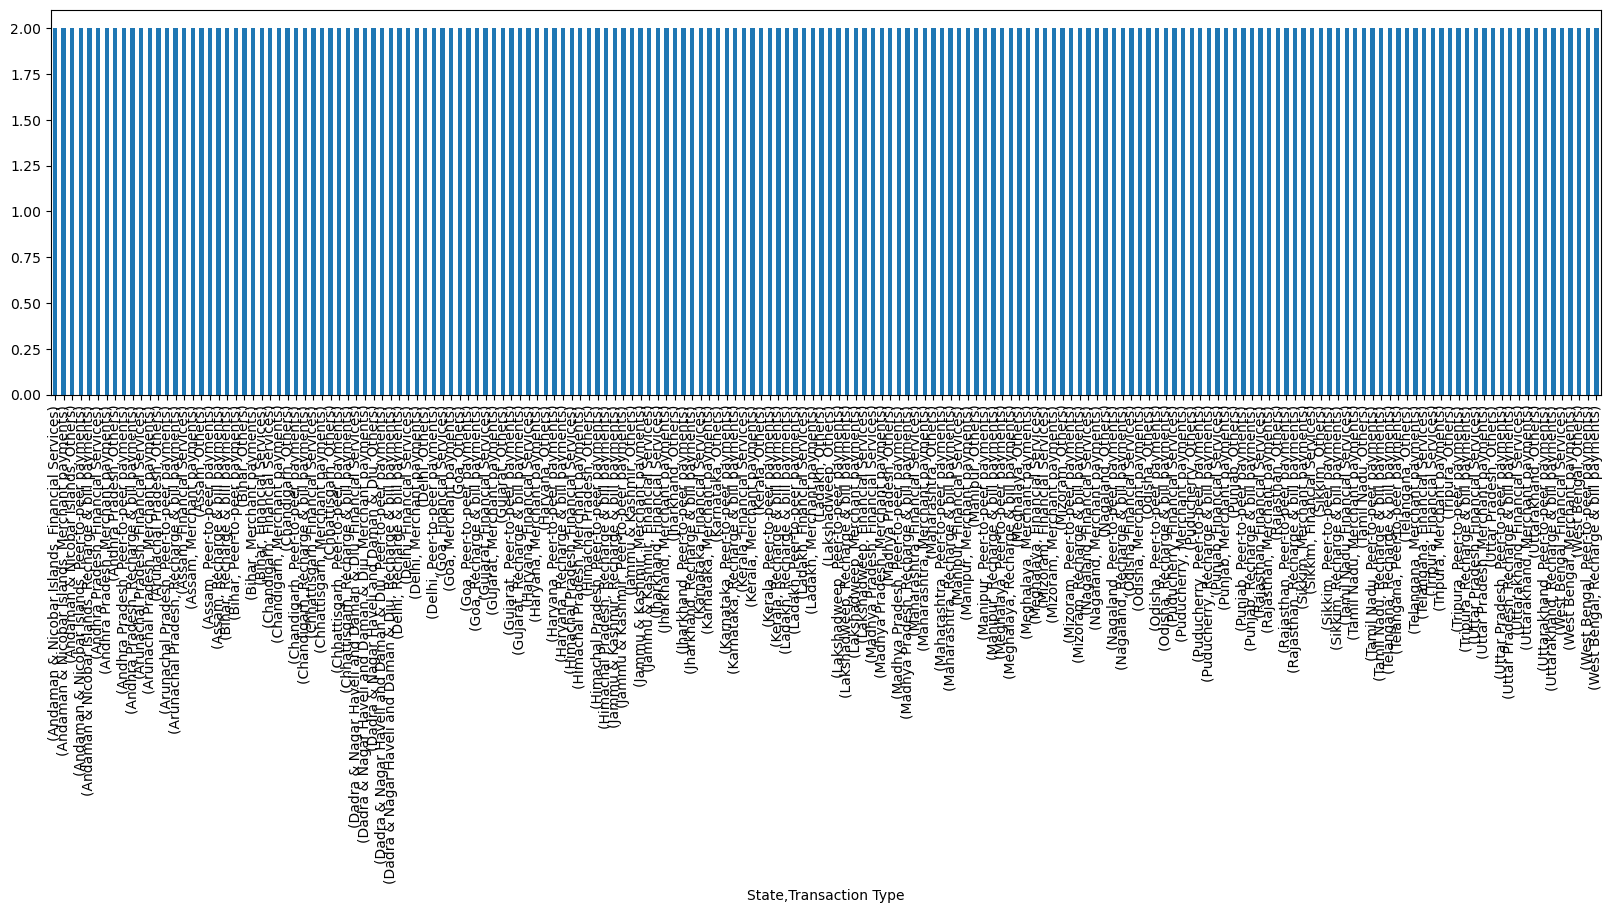

In [22]:
# distribution of transaction type.

# create a bar chart showing the distribution of different transaction type for each state,
# for the most recent quarter of the dataset.

year=state_txnsplit.loc[state_txnsplit['Year']==2021]

group=year.groupby('State')['Transaction Type'].value_counts()
group

# plotting
group.plot.bar(figsize=(20,5))

<Figure size 500x400 with 0 Axes>

<Axes: xlabel='Transaction Type', ylabel='Count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Recharge & bill payments'),
  Text(1, 0, 'Peer-to-peer payments'),
  Text(2, 0, 'Merchant payments'),
  Text(3, 0, 'Financial Services'),
  Text(4, 0, 'Others')])

Text(0, 0.5, 'frequency')

Text(0.5, 1.0, 'distribution of different transaction type')

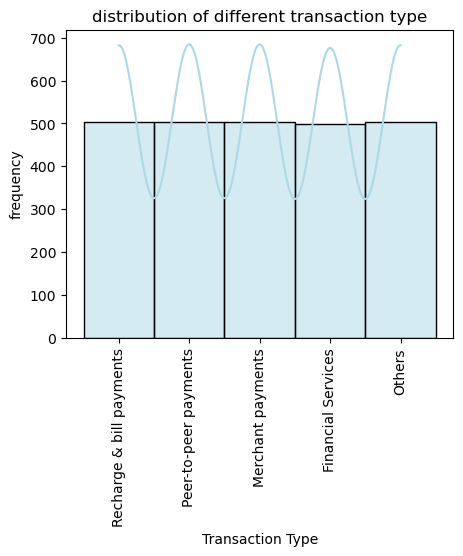

In [23]:
# distribution of transaction type.

plt.figure(figsize=(5,4))
sns.histplot(state_txnsplit['Transaction Type'],bins=20,color='lightblue',kde=True)
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title('distribution of different transaction type')

In [24]:
# identify unique mapping between district name and district code.



# data quality check

In [25]:
# for each state calculate the total no of transaction,total transaction amount and total registered users
# by summing up the values from district level data.

dist_level=district_txn.groupby('State',)[['Transactions','Amount (INR)','Registered Users']].sum()
dist_level
dist_level.shape

,Transactions,Amount (INR),Registered Users
State,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396
Andhra Pradesh,1781091169,3.860292e+12,158007957
Arunachal Pradesh,8043799,2.225183e+10,1862214
Assam,123577981,2.814087e+11,26860751
Bihar,713643889,1.639579e+12,115284760
Chandigarh,25516542,5.371208e+10,3801466
Chhattisgarh,241908549,4.156353e+11,37448388
Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
Delhi,1011031124,1.649942e+12,95374654


(36, 3)

In [26]:
# compare the coresponding values at the state level,make sure it match.
state_level=state_txn.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum()
state_level
state_level.shape

,Transactions,Amount (INR),Registered Users
State,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396
Andhra Pradesh,1781091169,3.187847e+12,158007957
Arunachal Pradesh,8043799,2.225183e+10,1862214
Assam,123577981,2.814087e+11,26860751
Bihar,713643889,1.639579e+12,115284760
Chandigarh,25516542,5.371208e+10,3801466
Chhattisgarh,241908549,4.156353e+11,37448388
Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
Delhi,1011031124,1.649942e+12,95374654


(36, 3)

In [27]:
# identifying discrepancies between district level and state level
# merging distlevel with state level to identify descrepancies

total=dist_level.merge(state_level[['Transactions','Amount (INR)','Registered Users']],on='State')
total

total['transaction_diff']=total['Transactions_x']-total['Transactions_y']
total['amount_diff']=total['Amount (INR)_x']-total['Amount (INR)_y']
total['registered_diff']=total['Registered Users_x']-total['Registered Users_y']

total

x=total['Amount (INR)_x'].sum()
y=total['Amount (INR)_y'].sum()
x
y
x-y
# total[total['transaction_diff']!=0]
# total[total['amount_diff']!=0]
# total[total['registered_diff']!=0]

# there is a descrepancies in the amount(inr)column in the data set

,Transactions_x,Amount (INR)_x,Registered Users_x,Transactions_y,Amount (INR)_y,Registered Users_y
State,,,,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
Andhra Pradesh,1781091169,3.860292e+12,158007957,1781091169,3.187847e+12,158007957
Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654


,Transactions_x,Amount (INR)_x,Registered Users_x,Transactions_y,Amount (INR)_y,Registered Users_y,transaction_diff,amount_diff,registered_diff
State,,,,,,,,,
Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396,0,4.768372e-07,0
Andhra Pradesh,1781091169,3.860292e+12,158007957,1781091169,3.187847e+12,158007957,0,6.724447e+11,0
Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214,0,-1.525879e-05,0
Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751,0,6.103516e-05,0
Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760,0,9.765625e-04,0
Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466,0,3.814697e-05,0
Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388,0,-6.713867e-04,0
Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112,0,1.144409e-05,0
Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654,0,4.882812e-04,0


36301604932775.984

35629160262599.375

672444670176.6094

# Data merging and advance analysis 

In [28]:
# merge state txn dataset with district demographics dataset.to calculate the ratio of registered
# users to the population for each state.

merge_state_district=state_txn.merge(district_demographics[['State','District','Population']],on='State')
merge_state_district

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,District,Population
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,Nicobar,36842
1,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,North and Middle Andaman,105597
2,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,South Andaman,238142
3,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,Nicobar,36842
4,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,North and Middle Andaman,105597
...,...,...,...,...,...,...,...,...,...,...
10383,West Bengal,2021,2,141897437,2.794348e+11,1969.273138,17979979,275341466,Paschim Medinipur,4776909
10384,West Bengal,2021,2,141897437,2.794348e+11,1969.273138,17979979,275341466,Purba Medinipur,5095875
10385,West Bengal,2021,2,141897437,2.794348e+11,1969.273138,17979979,275341466,Purulia,2927965
10386,West Bengal,2021,2,141897437,2.794348e+11,1969.273138,17979979,275341466,South 24 Parganas,8161961


,Registered Users,Population
State,,
Andaman & Nicobar Islands,1225188,5328134
Andhra Pradesh,2054103441,691302864
Arunachal Pradesh,46555350,22484658
Assam,913265534,482459390
Bihar,4380820880,1453451314
Chandigarh,3801466,14776300
Chhattisgarh,1048554864,362151412
Dadra & Nagar Haveli and Daman & Diu,8103336,8217384
Delhi,1049121194,235031174


,registered user ratio
State,
Andaman & Nicobar Islands,0.229947
Andhra Pradesh,2.971351
Arunachal Pradesh,2.070538
Assam,1.892938
Bihar,3.014082
Chandigarh,0.257268
Chhattisgarh,2.895349
Dadra & Nagar Haveli and Daman & Diu,0.986121
Delhi,4.463753


<Axes: xlabel='State'>

Text(0.5, 1.0, 'ratio of registered user to population by state')

Text(0, 0.5, 'rate')

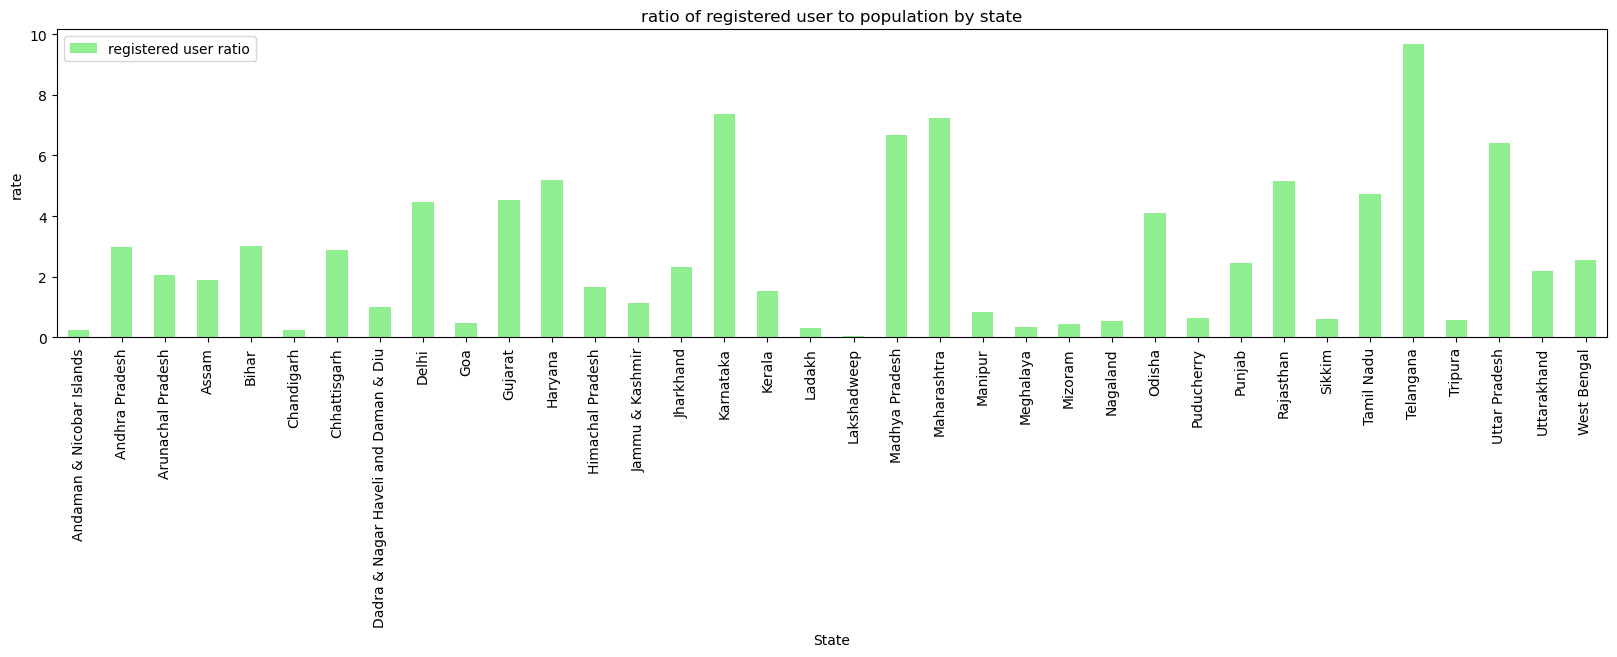

In [29]:
# calculate ratio of registered users to population of each state.

group_state=merge_state_district.groupby('State')[['Registered Users','Population']].sum()
group_state

ratio_registered=group_state['Registered Users']/group_state['Population']
ratio_registered=pd.DataFrame(ratio_registered)
ratio_registered.columns=['registered user ratio']
ratio_registered

# plotting
ratio_registered.plot.bar(figsize=(20,4),color='lightgreen')
plt.title('ratio of registered user to population by state')
plt.ylabel('rate')

# corelate population density with transaction volume.

In [30]:
# merging district_txn_user with district demographics.

district_txn_merge=district_txn.merge(district_demographics[['State','District','Code','Population','Density']],on=['State','District','Code'])
district_txn_merge.head()

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Population,Density
0,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0,238142,89
1,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0,238142,89
2,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0,238142,89
3,Andaman & Nicobar Islands,2018,4,South Andaman,AN03,20136,7.541184e+07,3745.125189,13133,0,238142,89
4,Andaman & Nicobar Islands,2019,1,South Andaman,AN03,25683,8.550197e+07,3329.127142,15961,0,238142,89


In [31]:
# calculate corelation between population density and transaction volume

corr_matrix=district_txn_merge[['Density','Amount (INR)','ATV (INR)','Registered Users','Population','Transactions']].corr()
corr_matrix.round(2)

,Density,Amount (INR),ATV (INR),Registered Users,Population,Transactions
Density,1.00,0.34,-0.05,0.30,0.30,0.31
Amount (INR),0.34,1.00,0.01,0.78,0.35,0.98
ATV (INR),-0.05,0.01,1.00,-0.07,-0.24,-0.03
Registered Users,0.30,0.78,-0.07,1.00,0.66,0.80
Population,0.30,0.35,-0.24,0.66,1.00,0.36
Transactions,0.31,0.98,-0.03,0.80,0.36,1.00


<Figure size 400x300 with 0 Axes>

<Axes: >

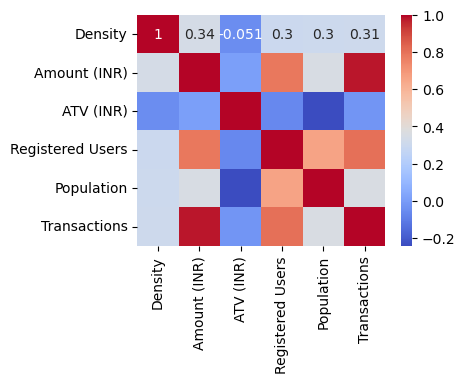

In [32]:
# plotting heat map to visualize properly.
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

# insights:
# there is a positive weak corelation between density and transaction volume.
# if the density increase the transaction volume increase but with low speed

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Density', ylabel='Transactions'>

Text(0.5, 1.0, 'corelation between population density and transactions')

Text(0.5, 0, 'density')

Text(0, 0.5, 'transaction volume')

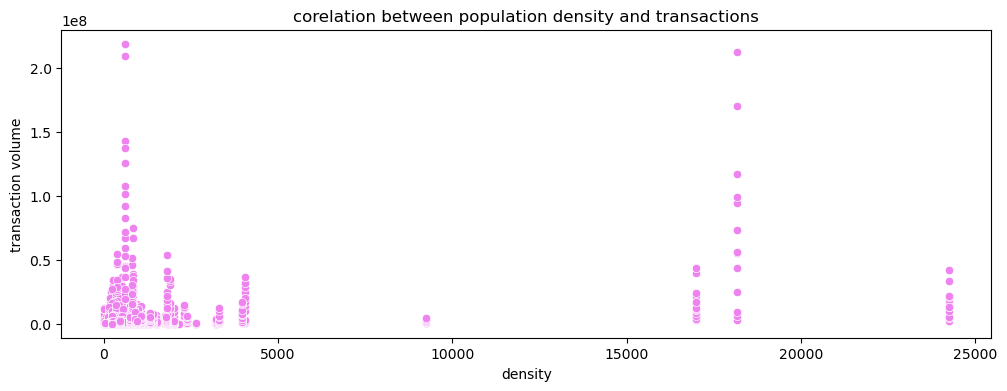

In [33]:
# create a scatter plot to visualize the relation between population density and transaction volume.

plt.figure(figsize=(12,4))
sns.scatterplot(x='Density',y='Transactions',data=district_txn_merge,color='violet')
plt.title('corelation between population density and transactions')
plt.xlabel('density')
plt.ylabel('transaction volume')
plt.show()

# data points are less scattered on the coordinate plain
# most of the data points are concentrated in the between 0-0.5 and 0-2.5k

# average transaction amount per user

,Amount (INR),Registered Users
State,,
Andaman & Nicobar Islands,2.601298e+08,408396
Andhra Pradesh,2.452190e+11,158007957
Arunachal Pradesh,1.589416e+09,1862214
Assam,2.010062e+10,26860751
Bihar,1.171128e+11,115284760
Chandigarh,3.836577e+09,3801466
Chhattisgarh,2.968824e+10,37448388
Dadra & Nagar Haveli and Daman & Diu,1.332770e+09,2701112
Delhi,1.178530e+11,95374654


State
Andaman & Nicobar Islands                636.954934
Andhra Pradesh                          1551.941059
Arunachal Pradesh                        853.509047
Assam                                    748.326893
Bihar                                   1015.856567
Chandigarh                              1009.236298
Chhattisgarh                             792.777438
Dadra & Nagar Haveli and Daman & Diu     493.415425
Delhi                                   1235.684851
Goa                                      664.997625
Gujarat                                  624.719328
Haryana                                  884.742992
Himachal Pradesh                         522.685817
Jammu & Kashmir                          801.635040
Jharkhand                                782.706171
Karnataka                               1533.877300
Kerala                                   519.631906
Ladakh                                   813.912874
Lakshadweep                              401.064206
Madhya

<Axes: xlabel='State'>

Text(0, 0.5, 'average transaction amount')

Text(0.5, 1.0, 'average transaction amount per user for each state')

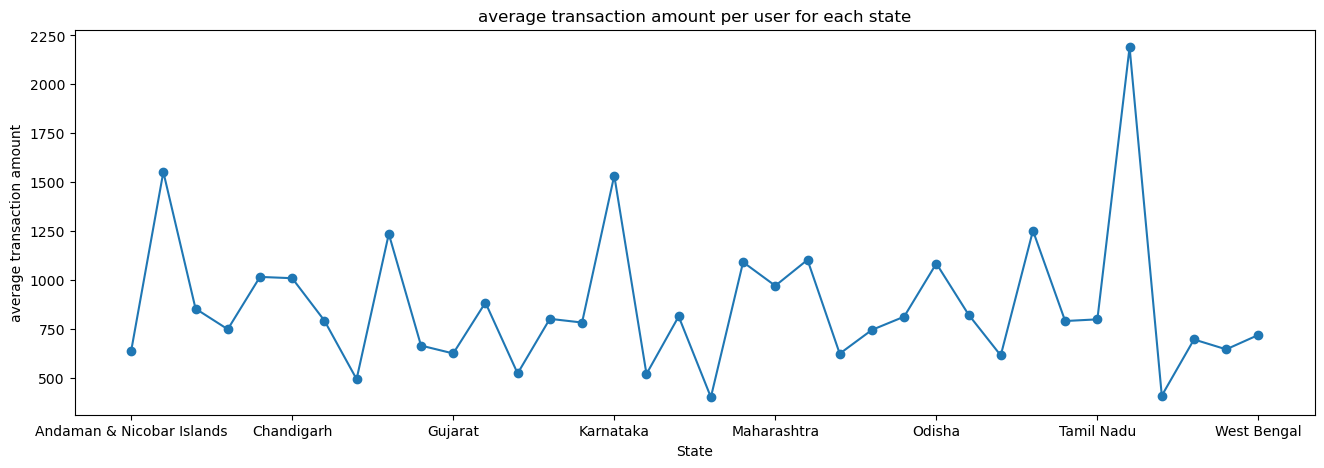

In [34]:
# calculate average transaction amount per user for each state.

average=state_txn.pivot_table(index='State',
                     values=['Registered Users','Amount (INR)'],
                     aggfunc={'Registered Users':np.sum,
                             'Amount (INR)':np.mean})
average
avg_transaction_peruser=average['Amount (INR)']/average['Registered Users']
avg_transaction_peruser
#plotting
avg_transaction_peruser.plot.line(figsize=(16,5),marker='o')
plt.ylabel('average transaction amount')
plt.title('average transaction amount per user for each state')

In [35]:
# identify top 5 state with heighest avg transaction per user and top 5 state with lowest avg transaction amont per user.

heighest=avg_transaction_peruser.nlargest(5)
heighest

lowest=avg_transaction_peruser.nsmallest(5)
lowest

State
Telangana         2189.536402
Andhra Pradesh    1551.941059
Karnataka         1533.877300
Rajasthan         1252.197765
Delhi             1235.684851
dtype: float64

State
Lakshadweep                             401.064206
Tripura                                 409.084591
Dadra & Nagar Haveli and Daman & Diu    493.415425
Kerala                                  519.631906
Himachal Pradesh                        522.685817
dtype: float64

<Axes: xlabel='State'>

Text(0.5, 1.0, 'top 5 state with heighest avg transaction amount per user')

Text(0.5, 0, 'state')

Text(0, 0.5, 'average Transactions amount')

<Axes: xlabel='State'>

Text(0.5, 1.0, 'top 5 state with lowest avg transaction amount per user')

Text(0.5, 0, 'state')

Text(0, 0.5, 'average Transactions amount')

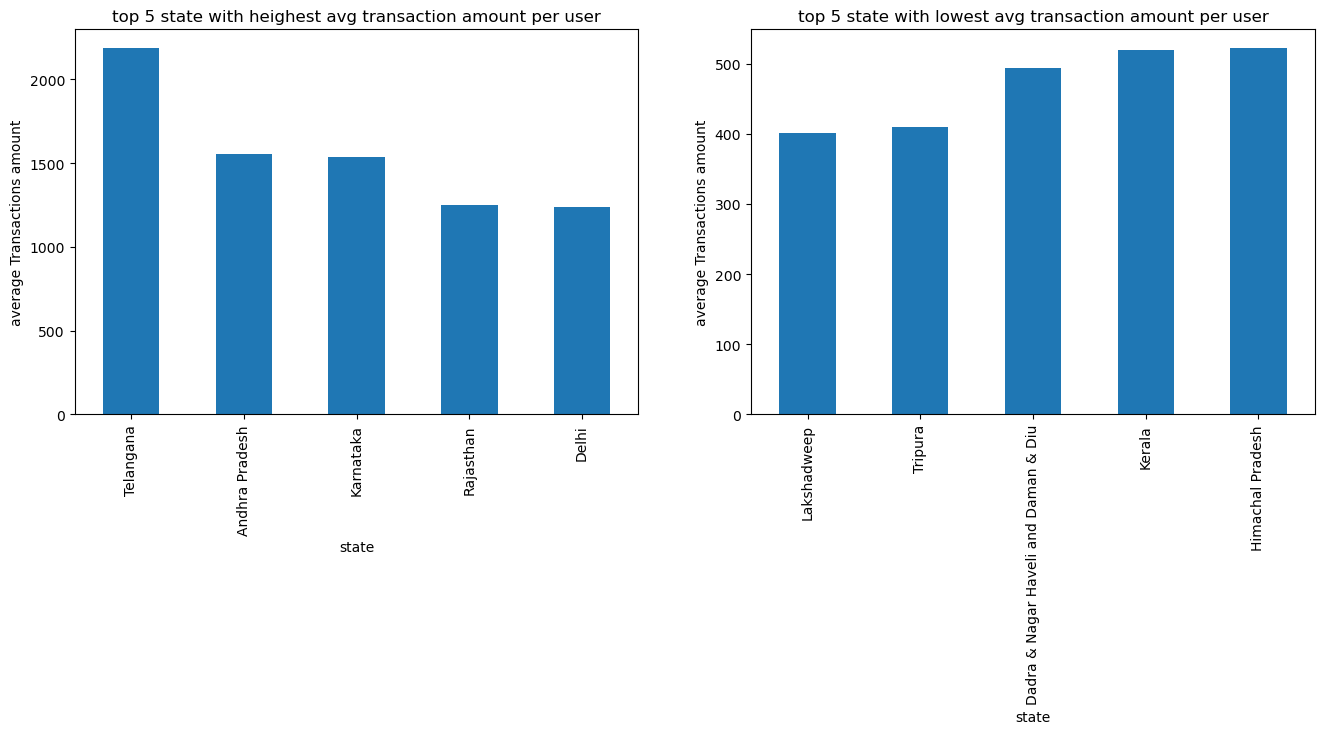

In [36]:
# visualising

fig,ax=plt.subplots(1,2,figsize=(16,5))

heighest.plot.bar(ax=ax[0])
ax[0].set_title('top 5 state with heighest avg transaction amount per user')
ax[0].set_xlabel('state')
ax[0].set_ylabel('average Transactions amount')

lowest.plot.bar(ax=ax[1])
ax[1].set_title('top 5 state with lowest avg transaction amount per user')
ax[1].set_xlabel('state')
ax[1].set_ylabel('average Transactions amount')

# device brand usage ratio

In [37]:
# merging state device data with state txn users dataset

state_devicedata_merge=state_devicedata.merge(state_txn[['State','Year','Quarter','Registered Users']],on=['State','Year','Quarter'])
state_devicedata_merge

,State,Year,Quarter,Brand,Registered Users_x,Percentage,Registered Users_y
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,6740
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392,6740
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697,6740
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332,6740
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258,6740
...,...,...,...,...,...,...,...
5539,West Bengal,2021,2,Lenovo,350841,0.019513,17979979
5540,West Bengal,2021,2,Asus,297579,0.016551,17979979
5541,West Bengal,2021,2,Huawei,272965,0.015182,17979979
5542,West Bengal,2021,2,Apple,201393,0.011201,17979979


In [38]:
# calculate ratio of users using each device brand to the total no of registered user in each state.

state_devicedata_merge['ratio_registered_user']=state_devicedata_merge['Registered Users_x']/state_devicedata_merge['Registered Users_y']
state_devicedata_merge

,State,Year,Quarter,Brand,Registered Users_x,Percentage,Registered Users_y,ratio_registered_user
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,6740,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392,6740,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697,6740,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332,6740,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258,6740,0.049258
...,...,...,...,...,...,...,...,...
5539,West Bengal,2021,2,Lenovo,350841,0.019513,17979979,0.019513
5540,West Bengal,2021,2,Asus,297579,0.016551,17979979,0.016551
5541,West Bengal,2021,2,Huawei,272965,0.015182,17979979,0.015182
5542,West Bengal,2021,2,Apple,201393,0.011201,17979979,0.011201


<Figure size 1400x400 with 0 Axes>

<BarContainer object of 5544 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Xiaomi'),
  Text(1, 0, 'Samsung'),
  Text(2, 0, 'Vivo'),
  Text(3, 0, 'Oppo'),
  Text(4, 0, 'OnePlus'),
  Text(5, 0, 'Realme'),
  Text(6, 0, 'Apple'),
  Text(7, 0, 'Motorola'),
  Text(8, 0, 'Lenovo'),
  Text(9, 0, 'Huawei'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Tecno'),
  Text(12, 0, 'Gionee'),
  Text(13, 0, 'Asus'),
  Text(14, 0, 'Micromax'),
  Text(15, 0, 'Infinix'),
  Text(16, 0, 'HMD Global'),
  Text(17, 0, 'Lava'),
  Text(18, 0, 'COOLPAD'),
  Text(19, 0, 'Lyf')])

Text(0.5, 0, 'device brands')

Text(0, 0.5, 'ratio registered user')

Text(0.5, 1.0, 'bar chart depecting device brand usage ratio for west bengal')

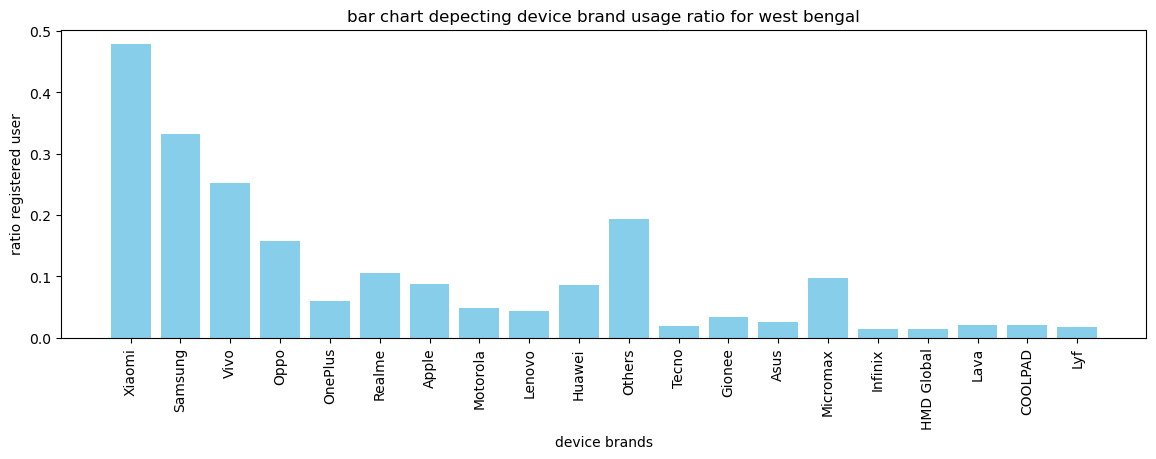

In [39]:
# creat a bar chart depecting device brand usage ratio for selected state.
# west bengal

bengal=state_devicedata_merge.loc[state_devicedata_merge['State']=='West Bengal']
# bengal

# plotting 
plt.figure(figsize=(14,4))
plt.bar(state_devicedata_merge['Brand'],state_devicedata_merge['ratio_registered_user'],color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('device brands')
plt.ylabel('ratio registered user')
plt.title('bar chart depecting device brand usage ratio for west bengal')
plt.show()

# plot the total transaction and amount over time for selected state

Year  Quarter
2018  1           11710225
      2           18082446
      3           53705416
      4           36513548
2019  1           47626388
      2           47023535
      3           66444829
      4           96805838
2020  1           66250381
      2           57676797
      3           79954504
      4          100340645
2021  1          118254052
      2          141897437
Name: Transactions, dtype: int64

Year  Quarter
2018  1          1.062598e+10
      2          1.862918e+10
      3          4.184393e+10
      4          4.048962e+10
2019  1          5.016467e+10
      2          5.710569e+10
      3          7.054053e+10
      4          8.820361e+10
2020  1          9.665331e+10
      2          1.000994e+11
      3          1.568134e+11
      4          1.991655e+11
2021  1          2.429372e+11
      2          2.794348e+11
Name: Amount (INR), dtype: float64

<Axes: xlabel='Year,Quarter'>

Text(0.5, 1.0, 'total transaction overtime for west bengal')

Text(0.5, 0, 'year/quarter')

Text(0, 0.5, 'transactions volume')

<Axes: xlabel='Year,Quarter'>

Text(0.5, 1.0, 'total transactions amount over time for west bengal')

Text(0.5, 0, 'year/quarter')

Text(0, 0.5, 'total transaction amount')

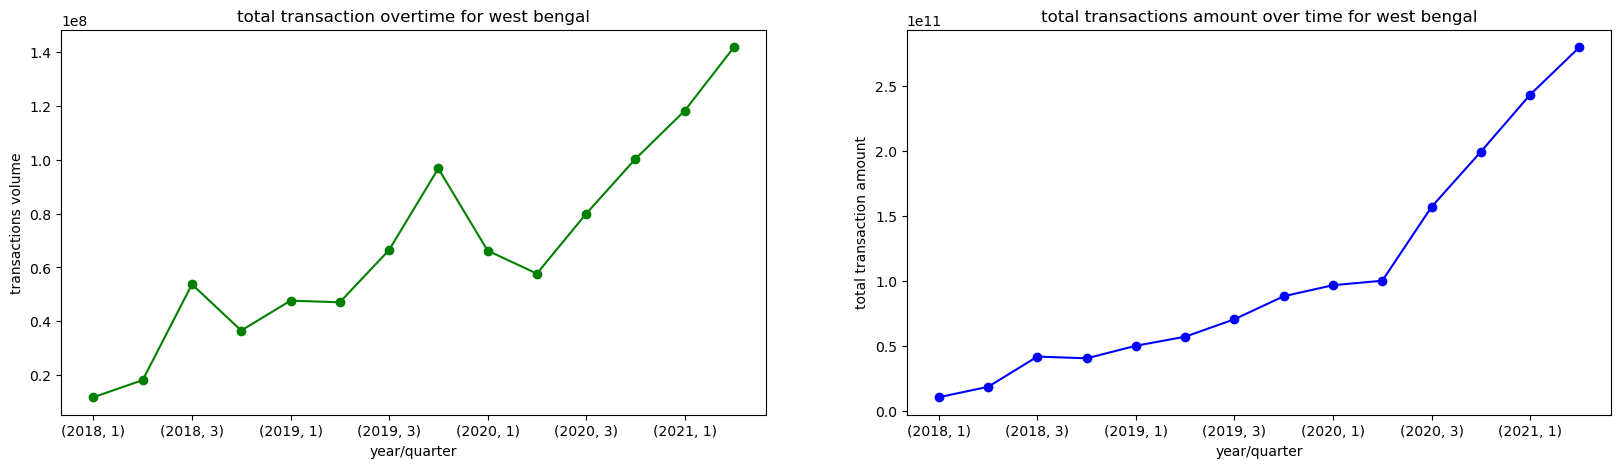

In [40]:
# create a line plot showing total no of transaction and total transaction amount over time for selected state.

west_bengal=state_txn.loc[state_txn['State']=='West Bengal']

transaction_group=west_bengal.groupby(['Year','Quarter'])['Transactions'].sum()
transaction_group

amount_group=west_bengal.groupby(['Year','Quarter'])['Amount (INR)'].sum()
amount_group

# plotting

fig,ax=plt.subplots(1,2,figsize=(20,5))

transaction_group.plot.line(ax=ax[0],color='g',marker='o')
ax[0].set_title('total transaction overtime for west bengal')
ax[0].set_xlabel('year/quarter')
ax[0].set_ylabel('transactions volume')

amount_group.plot.line(ax=ax[1],color='b',marker='o')
ax[1].set_title('total transactions amount over time for west bengal')
ax[1].set_xlabel('year/quarter')
ax[1].set_ylabel('total transaction amount')


<Figure size 500x400 with 0 Axes>

([<matplotlib.patches.Wedge at 0x211ae766950>,
 [Text(0.8899186877588753, 0.6465637858537406, 'recharge & bill'),
  Text(-0.3399187231970732, 1.046162158377023, 'peer_to_peer payments'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'financial services'),
  Text(-0.33991862524830174, -1.0461621902025062, 'merchant payments'),
  Text(0.8899187482945414, -0.6465637025335375, 'others')],
 [Text(0.4854101933230228, 0.35267115592022213, '20%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

Text(0.5, 1.0, 'percent distribution of transaction type for west bengal')

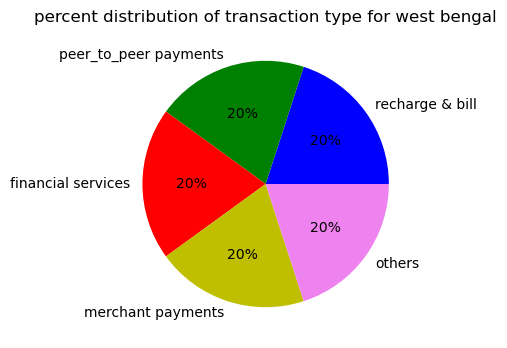

In [41]:
# create a pie chart showing distribution of transaction type for a selected state and quarter.

west_b=state_txnsplit.loc[state_txnsplit['State']=='West Bengal']
transaction_type=west_b['Transaction Type'].value_counts()

label=['recharge & bill','peer_to_peer payments','financial services','merchant payments','others']
color=['b','g','r','y','Violet']

# plotting
plt.figure(figsize=(5,4))
plt.pie(transaction_type,labels=label,colors=color,autopct='%.0f%%')
plt.title('percent distribution of transaction type for west bengal')
plt.show()

# visualize the population density of district in a selected state

<Figure size 1600x500 with 0 Axes>

<Axes: xlabel='Density', ylabel='District'>

Text(0.5, 1.0, 'population density of districts in west bengal')

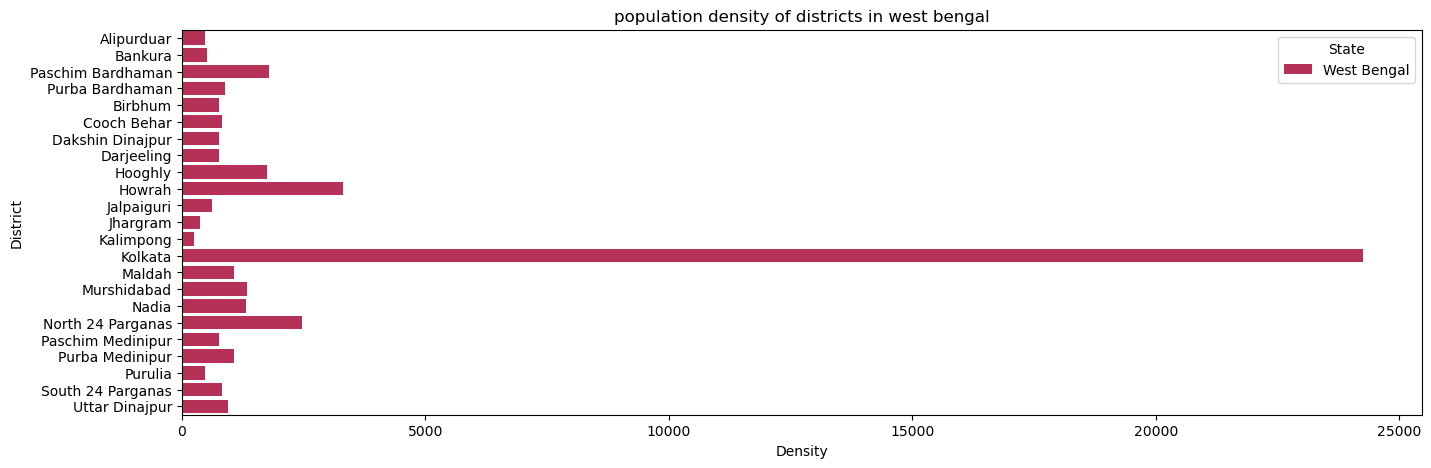

In [60]:
# create a bar plot showing population density of a district in a selected state.

bengal=district_demographics.loc[district_demographics['State']=='West Bengal']
# bengal

# plotting
plt.figure(figsize=(16,5))
sns.barplot(x='Density',y='District',data=bengal,hue='State',palette='rocket',estimator=sum)
plt.title('population density of districts in west bengal')
plt.show()

# insights and conclusion 

Year,2018,2019,2020,2021
State,,,,
Andaman & Nicobar Islands,58021,133104,446274,586166
Andhra Pradesh,77779112,297180254,763616699,642515104
Arunachal Pradesh,435229,1314871,3547905,2745794
Assam,8806777,22691015,47135224,44944965
Bihar,44556885,131986927,266563978,270536099
Chandigarh,2383031,5884404,8861323,8387784
Chhattisgarh,13933118,45826483,98023091,84125857
Dadra & Nagar Haveli and Daman & Diu,1044832,2559192,4807834,4050327
Delhi,64231244,254461712,364821900,327516268


<Axes: xlabel='State'>

Text(0.5, 1.0, 'yearly transaction volume for all state')

Text(0.5, 0, 'state')

Text(0, 0.5, 'total transactions volume')

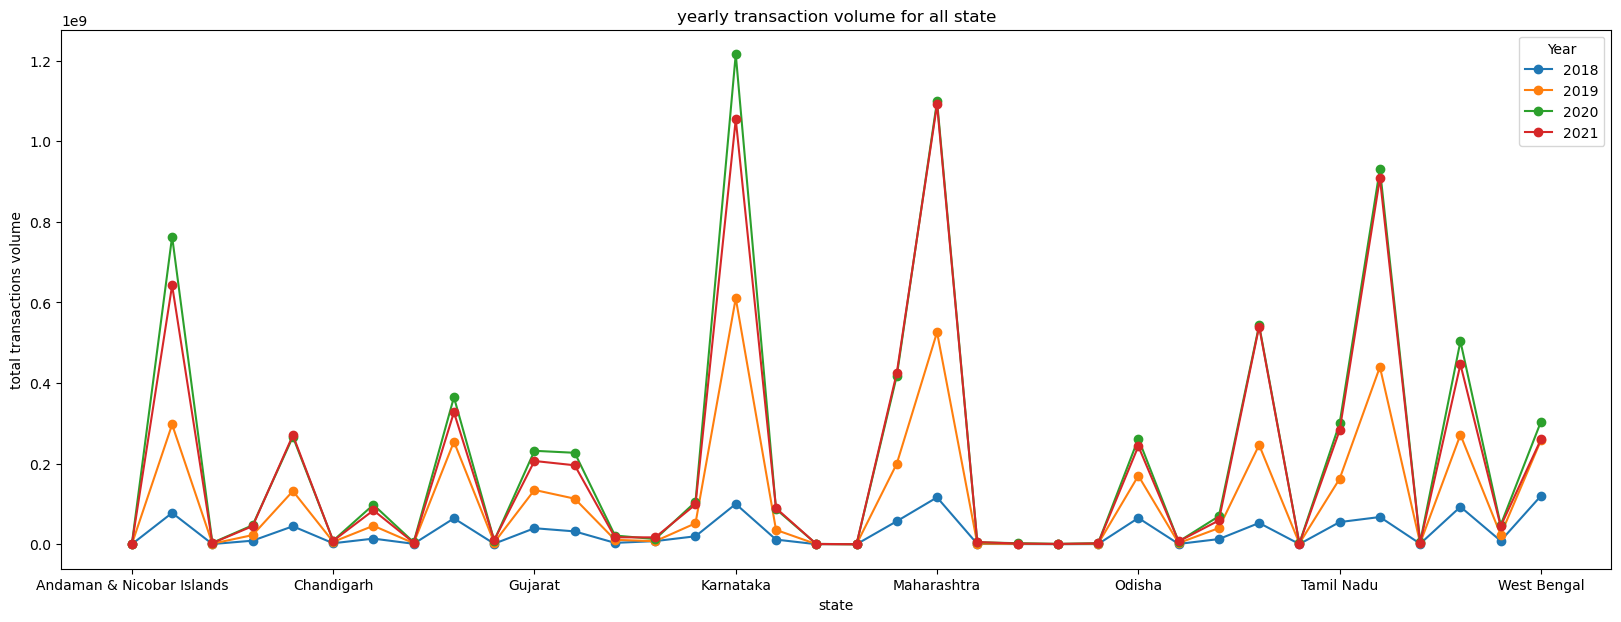

In [43]:
# analyze the transaction data to identify any noticeable trend and pattern.summarize your findings.

# analysing yearly trends of transactions volume for all the state.
line=state_txn.pivot_table(index='State',
                     columns='Year',
                     values='Transactions',
                     aggfunc=np.sum)
line
line.plot.line(figsize=(20,7),marker='o')
plt.title('yearly transaction volume for all state')
plt.xlabel('state')
plt.ylabel('total transactions volume')

In [44]:
# # findings:
# 1.as the year increases the transaction increases for all the state.
# 2.in 2020 karnataka has heighest total transaction volume
# 3.for maharashtra transaction volume is nearly constant for year 2020 & 2021
# 4.manipur,meghalaya,mizorom and nagaland has the the lowest and constant transaction,for all years
# 5.we can see from the graph their is huge increase of transaction after 2019 for all state,mostly because of pandemic.

Year,2018,2019,2020,2021
State,,,,
Andaman & Nicobar Islands,11923.656116,14195.078590,12275.354257,5835.640949
Andhra Pradesh,6246.685157,7179.271784,8635.711598,2411.612129
Arunachal Pradesh,9838.797313,10658.946295,10358.297292,6080.494889
Assam,5705.488814,8213.310755,9242.242829,4957.896783
Bihar,5809.130223,7931.711740,9733.639109,4851.956623
Chandigarh,8077.945776,8444.071032,9252.291691,3818.850546
Chhattisgarh,6038.159986,6683.276356,6868.293801,3521.730488
Dadra & Nagar Haveli and Daman & Diu,5849.364702,6058.454842,5889.421980,3026.296867
Delhi,6272.198759,5754.945466,6877.360146,3353.245929


<Axes: xlabel='State'>

Text(0.5, 1.0, 'yearly avg tran value per user for all the state')

Text(0.5, 0, 'state')

Text(0, 0.5, 'avg transactions value')

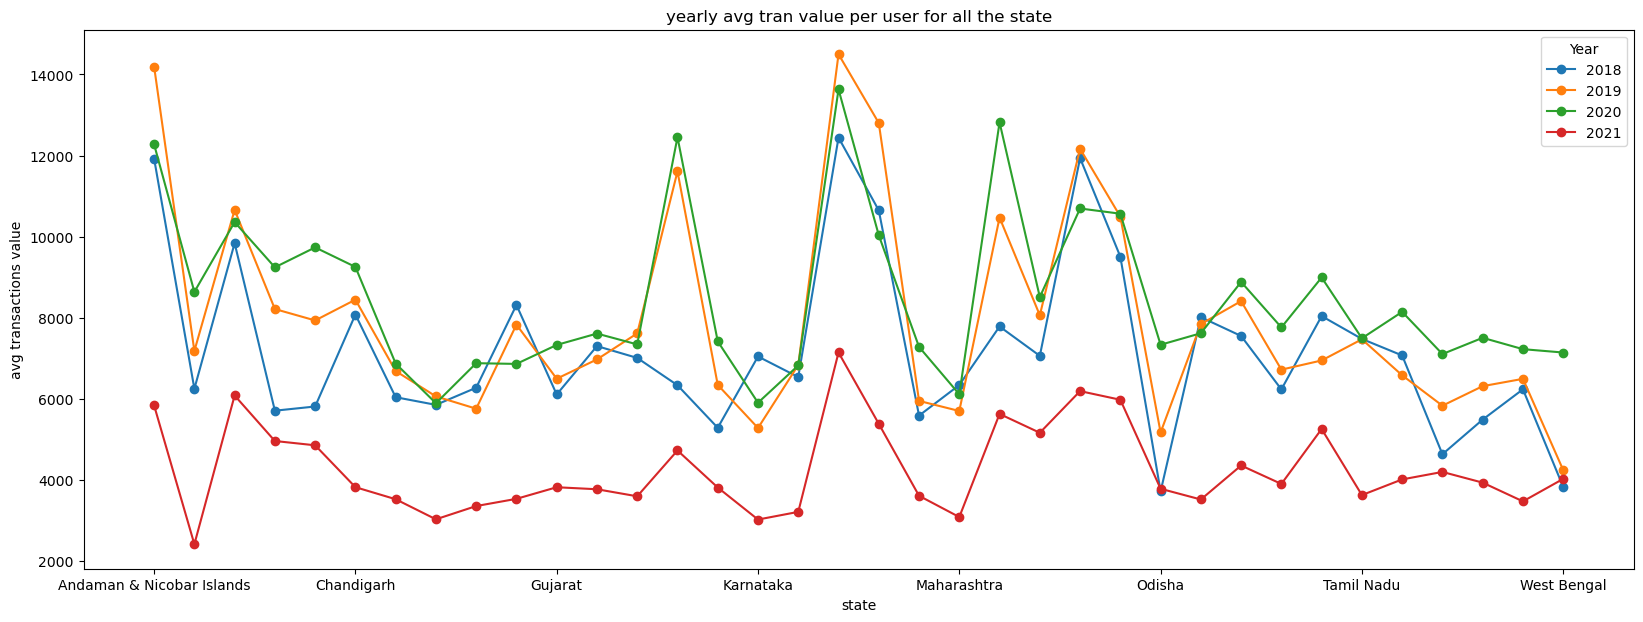

In [45]:
#yearly ATV per user for all the state

tran_amount=state_txn.pivot_table(index='State',
                     columns='Year',
                     values='ATV (INR)',
                     aggfunc=np.sum)
tran_amount
tran_amount.plot.line(figsize=(20,7),marker='o')
plt.title('yearly avg tran value per user for all the state')
plt.xlabel('state')
plt.ylabel('avg transactions value')

In [46]:
# # findings:
# the yearly atv trend increases increases overtime and then it decreases in 2021 for majority of the state.
# we can see in the year 2021 the average transaction value per user has decreased from all the state.
# in 2019 the atv per user from ladakh and andaman is the heighest.
# in 2019 andhra pradesh has the lowest atv per user

<Figure size 2000x600 with 0 Axes>

<Axes: xlabel='State', ylabel='Registered Users'>

Text(0.5, 0, 'state')

Text(0, 0.5, 'total registered user')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli and Daman & Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),


Text(0.5, 1.0, 'yearly total registered user for each state')

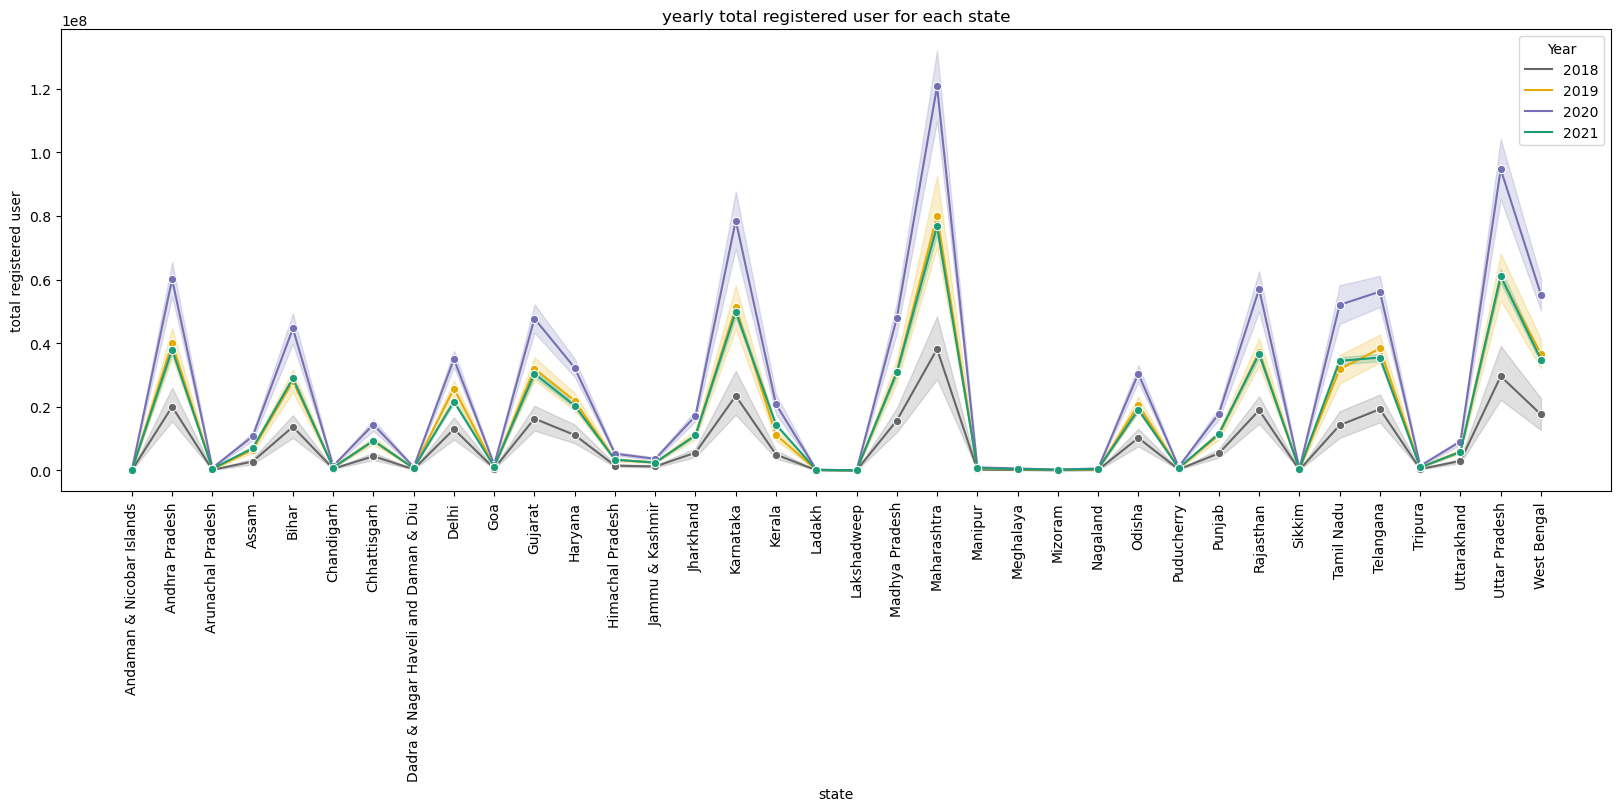

In [64]:
# Yearly trend of registered user for all state.

plt.figure(figsize=(20,6))
sns.lineplot(x='State',y='Registered Users',data=state_txn,hue='Year',palette='Dark2_r',marker='o',estimator=sum)
plt.xlabel('state')
plt.ylabel('total registered user')
plt.xticks(rotation=90)
plt.title('yearly total registered user for each state')
plt.show()

In [48]:
# # findings:
# the trend of registered user increases every year for all state,except for north-east states.
# in maharashtra total registered users is the heighest compared to other state.
# up is in the 2nd heighest position of registered user. 

# analysing top 10 districts 

<Axes: xlabel='District'>

Text(0.5, 0, 'districts')

Text(0, 0.5, 'Transaction volume')

Text(0.5, 1.0, 'top 10 districts with heighest no of transactions over time')

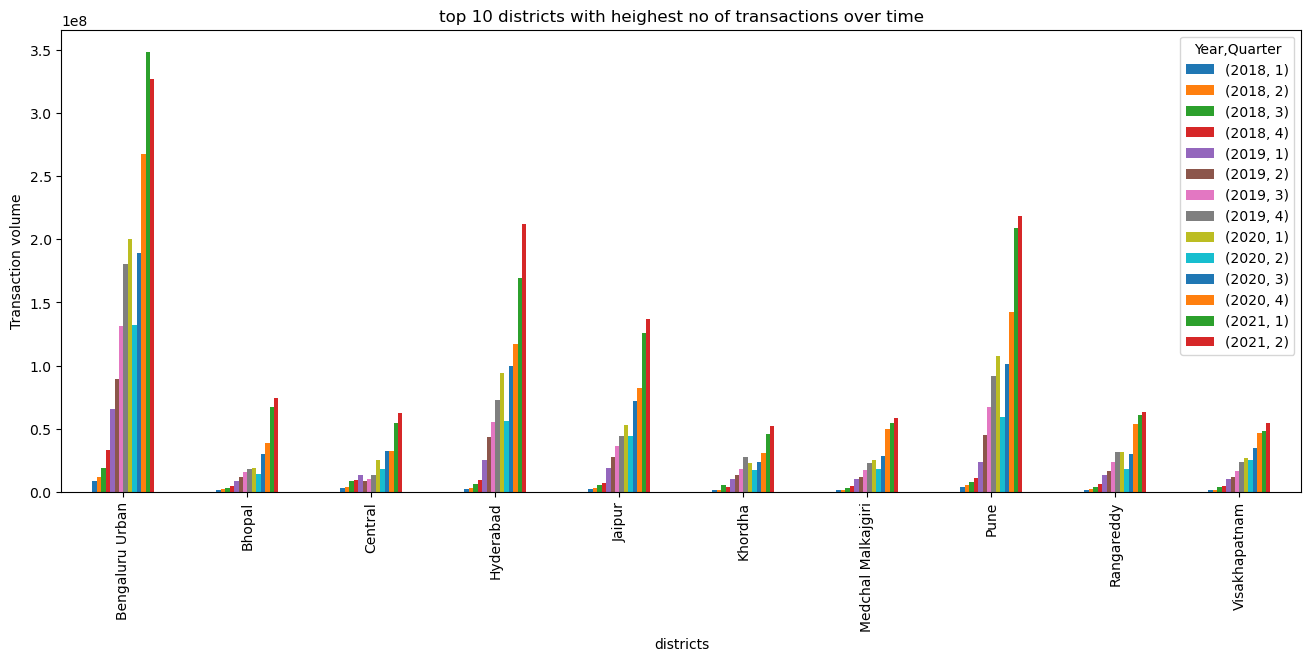

In [49]:
# identifying top 10 districts with heighest no of transactions over time

top_10=district_txn.groupby('District')['Transactions'].sum().sort_values(ascending=False)[0:10].index

districts=district_txn.loc[district_txn['District'].isin(top_10)]

top_district=districts.pivot_table(index='District',
                     columns=['Year','Quarter'],
                     values='Transactions',
                     aggfunc=np.sum)
# top_district
top_district.plot.bar(figsize=(16,6))
plt.xlabel('districts')
plt.ylabel('Transaction volume')
plt.title('top 10 districts with heighest no of transactions over time')

In [50]:
# # findings:
# 1.in benguluru-urban transactions in the year 2021,1rd quarter,is the heighest,from all the other districts.
# 2.we can clearly see from the bar graph the transaction trends is increasing for all the districts but then their is a sudden decreases in the
# year 2020,2 qrt. for all the districts.
# 3.benguluru-urban,hyderabad,jaipur and pune, these are the top 4 districts where transaction are the heighest in year 2021,2 qrt. 

Transaction Type
Peer-to-peer payments       9161937793
Merchant payments           6959228853
Recharge & bill payments    4245833207
Others                       117964108
Financial Services            47996333
Name: Transactions, dtype: int64

<Figure size 400x400 with 0 Axes>

([<matplotlib.patches.Wedge at 0x211af682350>,
 [Text(-1.1829046117600706, 0.20183329625400584, 'Peer-to-peer payments'),
  Text(0.7309161980923209, -0.8220471466809355, 'Merchant payments'),
  Text(0.7089823880339647, 0.8410374387966667, 'Recharge & bill payments'),
  Text(0.036003320163612226, 1.0994106425431749, 'Others'),
  Text(0.008078095045379272, 1.0999703379548187, 'Financial Services')],
 [Text(-0.6900276901933744, 0.11773608948150341, '44.6%'),
  Text(0.39868156259581133, -0.44838935273505565, '33.9%'),
  Text(0.38671766620034437, 0.45874769388909087, '20.7%'),
  Text(0.019638174634697574, 0.5996785322962771, '0.6%'),
  Text(0.004406233661115966, 0.5999838207026283, '0.2%')])

Text(0.5, 1.0, 'percent distribution of transaction type for total transaction volume for all the state and year')

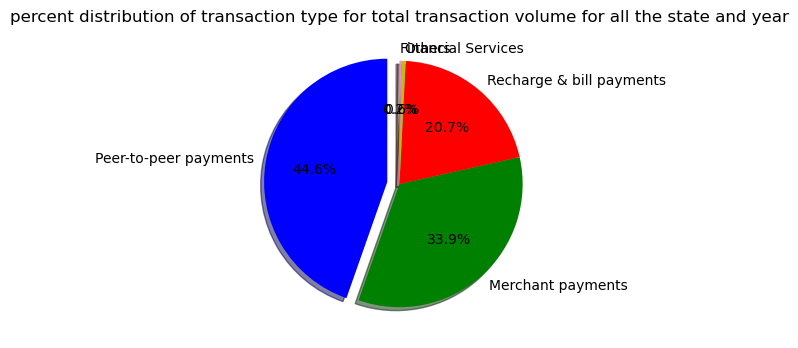

In [51]:
# identify total transactions volume of transaction type.

pie=state_txnsplit.groupby('Transaction Type')['Transactions'].sum().sort_values(ascending=False)
pie

label=['Peer-to-peer payments','Merchant payments','Recharge & bill payments','Others','Financial Services']
color=['b','g','r','y','Violet']
explode=[0.1,0,0,0,0]

#plotting
plt.figure(figsize=(4,4))
plt.pie(pie,labels=label,colors=color,explode=explode,autopct='%.1f%%',startangle=90,shadow=True,labeldistance=1.1)
plt.title('percent distribution of transaction type for total transaction volume for all the state and year')
plt.show()

In [67]:
# # findings:
# 1.the transactions volume for p2p is the heighest from all the other type.
# 2.in compare to others transactions type,other and financial services is very less.
# 3.we can tell from this chart that majority of the people makes transaction for peer-to-peer payments

# corelate demographic data and transaction data.

In [65]:
merge=state_txn.merge(district_demographics[['State','District','Population','Area (sq km)','Density']],on='State')
merge.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,District,Population,Area (sq km),Density
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,Nicobar,36842,1841.0,20
1,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,North and Middle Andaman,105597,3736.0,28
2,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,South Andaman,238142,2672.0,89
3,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,Nicobar,36842,1841.0,20
4,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,North and Middle Andaman,105597,3736.0,28


,Density,Transactions,Amount (INR),ATV (INR),Registered Users,Population,Area (sq km)
Density,1.00,0.04,0.04,-0.08,0.06,0.22,-0.17
Transactions,0.04,1.00,0.98,-0.13,0.83,0.24,0.19
Amount (INR),0.04,0.98,1.00,-0.05,0.82,0.23,0.18
ATV (INR),-0.08,-0.13,-0.05,1.00,-0.18,-0.30,-0.12
Registered Users,0.06,0.83,0.82,-0.18,1.00,0.43,0.21
Population,0.22,0.24,0.23,-0.30,0.43,1.00,0.25
Area (sq km),-0.17,0.19,0.18,-0.12,0.21,0.25,1.00


<Figure size 500x300 with 0 Axes>

<Axes: >

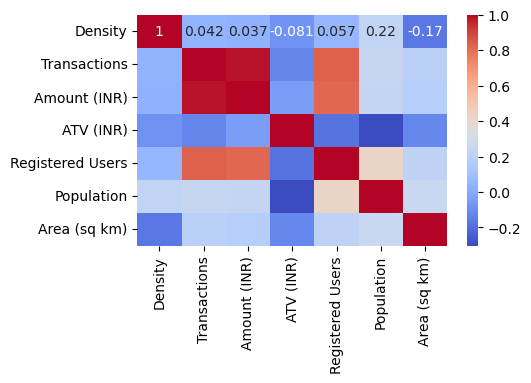

In [66]:
# corelation between demographic data and transaction data
# corelation between population density and transaction volume.

matrix=merge[['Density','Transactions','Amount (INR)','ATV (INR)','Registered Users','Population','Area (sq km)']].corr()
matrix.round(2)

plt.figure(figsize=(5,3))
sns.heatmap(matrix,annot=True,cmap='coolwarm')


In [ ]:
# findings:
# there is no corelation between population density and transaction volume from(state_txn and district demo)